In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread("/james_webb.jpg")
img2=cv2.imread("/content/hey3.jpg")
img3=cv2.imread("/content/puzzle.jpg")

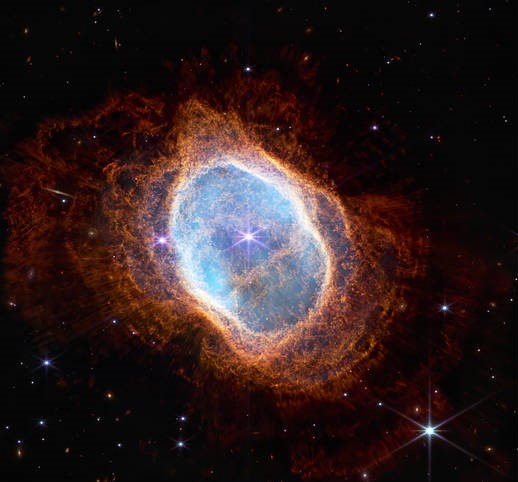

In [ ]:
cv2_imshow(img3)

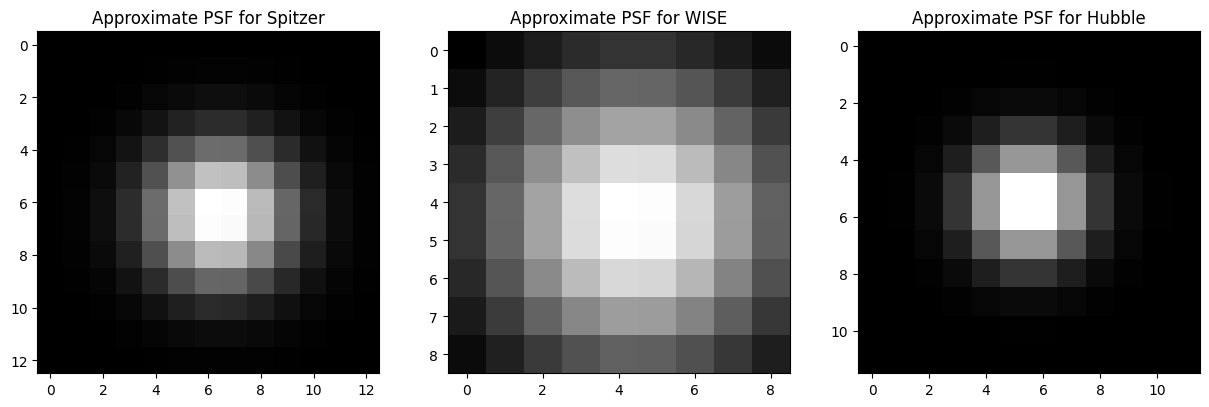

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Create a simple 2D Gaussian function for the PSF
def gaussian_psf(size, sigma):
    x, y = np.meshgrid(np.linspace(-size//2, size//2, size), np.linspace(-size//2, size//2, size))
    psf = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return psf / np.sum(psf)  # Normalize the PSF

# Define approximate PSFs for Spitzer and WISE
psf_spitzer = gaussian_psf(13, 2)  # Adjust size and sigma as needed
psf_wise = gaussian_psf(9, 3)     # Adjust size and sigma as needed
psf_hubble = gaussian_psf(12, 1.5)

# Display the PSFs
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(psf_spitzer, cmap='gray')
plt.title('Approximate PSF for Spitzer')
plt.subplot(1, 3, 2)
plt.imshow(psf_wise, cmap='gray')
plt.title('Approximate PSF for WISE')
plt.subplot(1, 3, 3)
plt.imshow(psf_hubble, cmap='gray')
plt.title('Approximate PSF for Hubble')
plt.show()








In [ ]:
# Apply convolution to simulate Spitzer image
simulated_spitzer = cv2.filter2D(img3, -1, psf_spitzer)

# Apply convolution to simulate WISE image
simulated_wise = cv2.filter2D(img3, -1, psf_wise)

simulated_hubble=cv2.filter2D(img3, -1, psf_hubble)


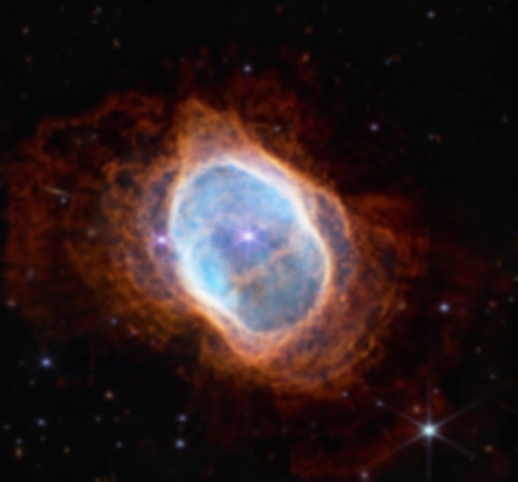

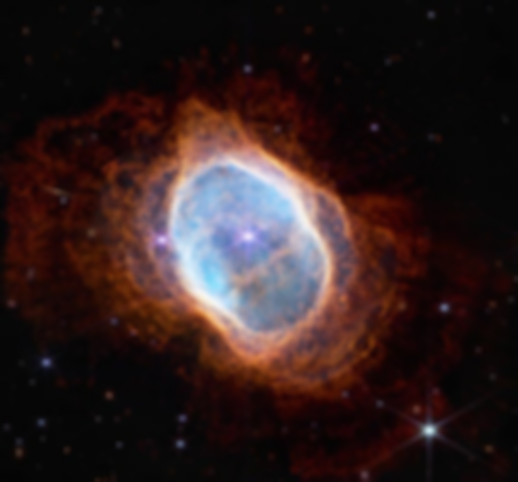

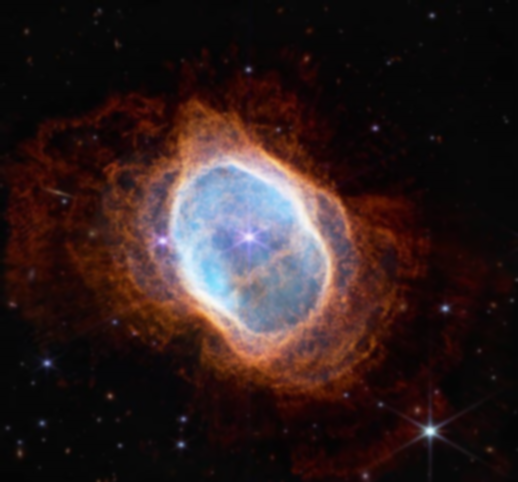

In [ ]:
# Display the original and simulated images side by side

cv2_imshow(simulated_spitzer)
cv2_imshow(simulated_wise)
cv2_imshow(simulated_hubble)
cv2.waitKey(0)
cv2.destroyAllWindows()
